## Librairies importation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import gamma, powerlaw

## Read RMSC01 logs and get orderbook

In [2]:
stats = {}

dir_count = 0
file_count = 0

for log_dir in ["log/rmsc01"]:
    if dir_count % 100 == 0:
        print("Completed {} directories".format(dir_count))
    dir_count += 1
    for file in sorted(os.listdir(log_dir)):  # sorted([file for file in os.listdir(log_dir) if "agent" in file.lower()]):
        df = pd.read_pickle(os.path.join(log_dir, file), compression="bz2")
        stats[file[:-4]] = df

Completed 0 directories


In [3]:
# sorted(list(stats.keys()), key=lambda x: x.split("_")[-1])
for key in ['EXCHANGE_AGENT', 'fundamental_JPM', 'orderbook_JPM', 'summary_log', 'MARKET_MAKER_AGENT_1',
            'ZI_AGENT_2', 'HBL_AGENT_52', 'MOMENTUM_AGENT_77']:
    print(key)
    display(stats[key])

EXCHANGE_AGENT


,EventType,Event
EventTime,,
NaT,AGENT_TYPE,ExchangeAgent
2019-06-28 09:30:00,WHEN_MKT_OPEN,1
2019-06-28 09:30:00,WHEN_MKT_CLOSE,1
2019-06-28 09:30:00,WHEN_MKT_OPEN,2
2019-06-28 09:30:00,WHEN_MKT_CLOSE,2
...,...,...
2019-06-28 16:01:00,QUERY_SPREAD,96
2019-06-28 16:01:00,QUERY_SPREAD,97
2019-06-28 16:01:00,QUERY_SPREAD,98


fundamental_JPM


,FundamentalValue
FundamentalTime,
2019-06-28 09:30:00.000000000,100000.0
2019-06-28 09:30:00.000000002,100000.0
2019-06-28 09:30:00.000000003,100000.0
2019-06-28 09:30:00.000000005,100000.0
2019-06-28 09:30:00.000000009,100000.0
...,...
2019-06-28 15:58:58.964766114,98995.0
2019-06-28 15:59:26.479139444,99019.0
2019-06-28 15:59:31.019746331,99067.0


orderbook_JPM


,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
2019-06-28 09:30:00.000000002,NaN,NaN,99964,100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28 09:30:00.000000003,NaN,NaN,99964,100,NaN,NaN,99934,100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28 09:30:00.000000005,NaN,NaN,99970,100,NaN,NaN,99964,100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28 09:30:00.000000009,NaN,NaN,100100,100,NaN,NaN,99970,100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28 09:30:00.000000010,NaN,NaN,100100,100,NaN,NaN,99970,100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-28 15:59:31.019746331,98761,66,98524,167,98792,166,98449,67,98858,166,...,98086,100,99441,100,98073,100,99449,100,98024,100
2019-06-28 15:59:39.105498822,98761,66,98733,100,98792,166,98524,67,98858,166,...,98169,100,99441,100,98086,100,99449,100,98073,100
2019-06-28 15:59:40.000000000,98792,166,98733,166,98858,166,98524,67,98903,166,...,98169,100,99449,100,98086,100,99595,100,98073,100
2019-06-28 15:59:50.000000000,98792,265,98733,265,98858,265,98524,166,98903,100,...,98169,100,99449,100,98086,100,99595,100,98073,100


summary_log


,AgentID,AgentStrategy,EventType,Event
0,1,MarketMakerAgent,STARTING_CASH,10000000
1,2,ZeroIntelligenceAgent,STARTING_CASH,10000000
2,3,ZeroIntelligenceAgent,STARTING_CASH,10000000
3,4,ZeroIntelligenceAgent,STARTING_CASH,10000000
4,5,ZeroIntelligenceAgent,STARTING_CASH,10000000
...,...,...,...,...
370,98,MomentumAgent,ENDING_CASH,9435205
371,99,MomentumAgent,FINAL_CASH_POSITION,10009201
372,99,MomentumAgent,ENDING_CASH,9811735
373,100,MomentumAgent,FINAL_CASH_POSITION,10008984


MARKET_MAKER_AGENT_1


,EventType,Event
EventTime,,
NaT,AGENT_TYPE,MarketMakerAgent
NaT,STARTING_CASH,10000000
2019-06-28 09:30:00,HOLDINGS_UPDATED,{'CASH': 10000000}
2019-06-28 09:30:10,BID_DEPTH,"[(100001, 100), (99985, 100), (99976, 100), (9..."
2019-06-28 09:30:10,ASK_DEPTH,"[(100017, 200), (100029, 100), (100030, 200), ..."
...,...,...
2019-06-28 16:00:20,FINAL_HOLDINGS,"{ JPM: -1305, CASH: 145973256 }"
2019-06-28 16:00:20,FINAL_CASH_POSITION,145973256
2019-06-28 16:00:20,MARK_TO_MARKET,-1305 JPM @ 98733 == -128846565


ZI_AGENT_2


,EventType,Event
EventTime,,
NaT,AGENT_TYPE,ZeroIntelligenceAgent
NaT,STARTING_CASH,10000000
2019-06-28 09:30:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2019-06-28 09:30:00.000000021,BID_DEPTH,"[(100017, 100)]"
2019-06-28 09:30:00.000000021,ASK_DEPTH,"[(100100, 100)]"
...,...,...
2019-06-28 15:42:01.433898371,FINAL_CASH_POSITION,-7659044
2019-06-28 15:42:01.433898371,MARK_TO_MARKET,181 JPM @ 98948 == 17909588
2019-06-28 15:42:01.433898371,MARKED_TO_MARKET,10250544


HBL_AGENT_52


,EventType,Event
EventTime,,
NaT,AGENT_TYPE,HeuristicBeliefLearningAgent
NaT,STARTING_CASH,10000000
2019-06-28 09:30:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2019-06-28 09:30:00.000000083,BID_DEPTH,"[(100005, 100)]"
2019-06-28 09:30:00.000000083,ASK_DEPTH,"[(100017, 100)]"
...,...,...
2019-06-28 15:32:31.415050757,FINAL_CASH_POSITION,40322700
2019-06-28 15:32:31.415050757,MARK_TO_MARKET,-300 JPM @ 98665 == -29599500
2019-06-28 15:32:31.415050757,MARKED_TO_MARKET,10723200


MOMENTUM_AGENT_77


,EventType,Event
EventTime,,
NaT,AGENT_TYPE,MomentumAgent
NaT,STARTING_CASH,10000000
2019-06-28 09:30:00,HOLDINGS_UPDATED,{'CASH': 10000000}
2019-06-28 09:31:00,BID_DEPTH,"[(99976, 182)]"
2019-06-28 09:31:00,ASK_DEPTH,"[(100017, 282)]"
...,...,...
2019-06-28 16:01:00,MKT_CLOSED,
2019-06-28 16:01:00,FINAL_HOLDINGS,{ CASH: 8679226 }
2019-06-28 16:01:00,FINAL_CASH_POSITION,8679226


In [4]:
orderbook = stats['orderbook_JPM']
orderbook = orderbook[orderbook["ask_price_1"].notnull() & orderbook["bid_price_1"].notnull()]

In [5]:
orderbook = stats['orderbook_JPM']
orderbook = orderbook[orderbook["ask_price_1"].notnull() & orderbook["bid_price_1"].notnull()]
orderbook

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
2019-06-28 09:30:00.000000011,100188,100,99970,100,NaN,NaN,99964,100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28 09:30:00.000000012,100117,100,99970,100,100188,100,99964,100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28 09:30:00.000000013,100117,100,100017,100,100188,100,99970,100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28 09:30:00.000000015,100117,100,100017,100,100188,100,99970,100,100204,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28 09:30:00.000000017,100117,100,100041,100,100188,100,100017,100,100204,100,...,99849,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-28 15:59:31.019746331,98761,66,98524,167,98792,166,98449,67,98858,166,...,98086,100,99441,100,98073,100,99449,100,98024,100
2019-06-28 15:59:39.105498822,98761,66,98733,100,98792,166,98524,67,98858,166,...,98169,100,99441,100,98086,100,99449,100,98073,100
2019-06-28 15:59:40.000000000,98792,166,98733,166,98858,166,98524,67,98903,166,...,98169,100,99449,100,98086,100,99595,100,98073,100
2019-06-28 15:59:50.000000000,98792,265,98733,265,98858,265,98524,166,98903,100,...,98169,100,99449,100,98086,100,99595,100,98073,100


## Notation and definitions

In [6]:
ask_price = orderbook["ask_price_1"]
bid_price = orderbook["bid_price_1"]
mid_price = (ask_price + bid_price) / 2

ask_size = orderbook["ask_size_1"]
bid_size = orderbook["bid_size_1"]

In [7]:
def m(t):
    return mid_price[mid_price.index <= t].values[-1]

def r(t, dt):
    return np.log(m(t + dt)) - np.log(m(t))

def S_a(t):
    return ask_size[ask_size.index <= t].values[-1]

def S_b(t):
    return bid_size[bid_size.index <= t].values[-1]

In [8]:
time = pd.date_range(
    pd.to_datetime("2019-06-28 09:30:00"), pd.to_datetime("2019-06-28 16:00:00"), freq='10S'
)
return_10s = pd.DataFrame({
    'time': time[1:], 'return': [r(t, pd.Timedelta(10, unit='s')) for t in time[1:]]
})
return_10s = return_10s.set_index('time')
return_10s

,return
time,
2019-06-28 09:30:10,0.000000
2019-06-28 09:30:20,-0.000080
2019-06-28 09:30:30,0.000000
2019-06-28 09:30:40,0.000000
2019-06-28 09:30:50,-0.000045
...,...
2019-06-28 15:59:20,0.000142
2019-06-28 15:59:30,0.001216
2019-06-28 15:59:40,0.000000


## Stylized facts about asset return distributions

### Absence of autocorrelations: $corr(r_{t + \tau, \Delta_t}, \ r_{t, \Delta_t})$

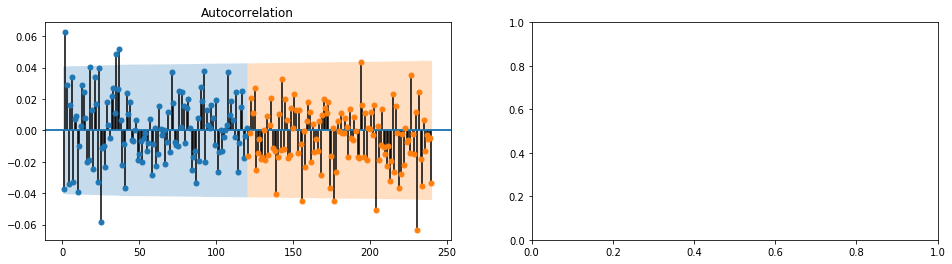

In [9]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)
# 1 lag = 10s
sm.graphics.tsa.plot_acf(return_10s, lags=[ind for ind in range(1, 121)], ax=ax[0])  # 0 - 20 min
sm.graphics.tsa.plot_acf(return_10s, lags=[ind for ind in range(121, 241)], ax=ax[0])  # 20 - 40 min
plt.show()

### Volatility clustering: $corr(r^2_{t + \tau, \Delta_t}, \ r^2_{t, \Delta_t})$

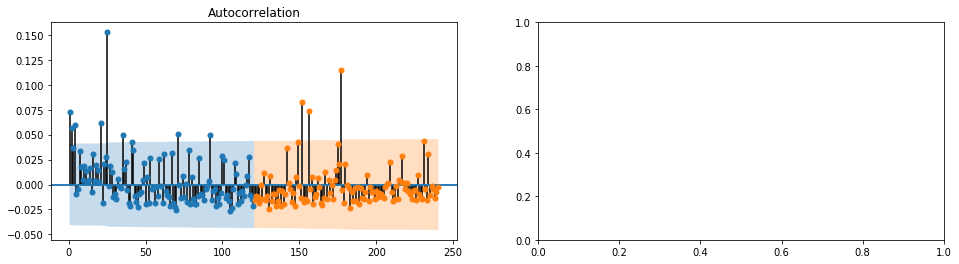

In [10]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)
# 1 lag = 10s
sm.graphics.tsa.plot_acf(return_10s ** 2, lags=[ind for ind in range(1, 121)], ax=ax[0])  # 0 - 20 min
sm.graphics.tsa.plot_acf(return_10s ** 2, lags=[ind for ind in range(121, 241)], ax=ax[0])  # 20 - 40 min
plt.show()

### Long range dependence: $corr(|r_{t + \tau, \Delta_t}|, \ |r_{t, \Delta_t}|) \sim \tau^{-\beta}$, $\beta \in [0.2, 0.4]$

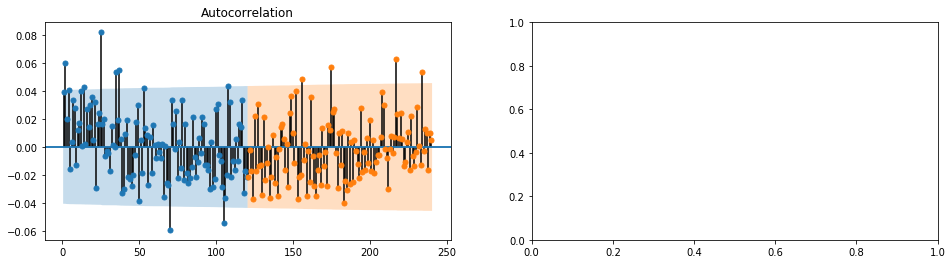

In [11]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)
# 1 lag = 10s
sm.graphics.tsa.plot_acf(np.abs(return_10s), lags=[ind for ind in range(1, 121)], ax=ax[0])  # 0 - 20 min
sm.graphics.tsa.plot_acf(np.abs(return_10s), lags=[ind for ind in range(121, 241)], ax=ax[0])  # 20 - 40 min
plt.show()

## Stylized facts about volumes and order flow

### Order book volumes

Where to get volumes? Only price and size...

In [12]:
ask_law = gamma.fit(ask_size.values.tolist())
bid_law = gamma.fit(bid_size.values.tolist())

Gamma law for ask: alpha = 4.664421117171182, loc = -35.76857011837666, scale = 53.63095232993773
Gamma law for bid: alpha = 4.49768847845721, loc = -28.44250574494591, scale = 53.853116840271326


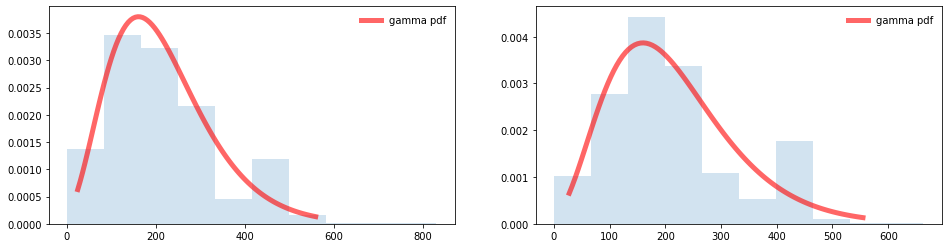

In [13]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)

print("Gamma law for ask: alpha = {}, loc = {}, scale = {}".format(*ask_law))
ax[0].hist(ask_size, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(gamma.ppf(0.01, *ask_law), gamma.ppf(0.99, *ask_law), 100)
ax[0].plot(x, gamma.pdf(x, *ask_law), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax[0].legend(loc='best', frameon=False)

print("Gamma law for bid: alpha = {}, loc = {}, scale = {}".format(*bid_law))
ax[1].hist(bid_size, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(gamma.ppf(0.01, *bid_law), gamma.ppf(0.99, *bid_law), 100)
ax[1].plot(x, gamma.pdf(x, *bid_law), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax[1].legend(loc='best', frameon=False)

plt.show()

### Order sizes

It clearly does not fit to a powerlaw distribution, looks like a gamma as above...

In [14]:
ask_law = powerlaw.fit(ask_size.values.tolist())
bid_law = powerlaw.fit(bid_size.values.tolist())

Powerlaw law for ask: alpha = 0.6434357421718558, loc = 0.9999999999999999, scale = 830.9360568723934
Powerlaw law for bid: alpha = 0.7680167437923526, loc = 0.9999999999988776, scale = 665.5447010227892


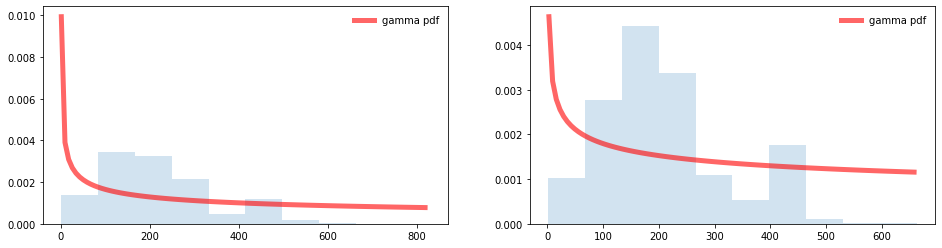

In [15]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)

print("Powerlaw law for ask: alpha = {}, loc = {}, scale = {}".format(*ask_law))
ax[0].hist(ask_size, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(powerlaw.ppf(0.01, *ask_law), powerlaw.ppf(0.99, *ask_law), 100)
ax[0].plot(x, powerlaw.pdf(x, *ask_law), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax[0].legend(loc='best', frameon=False)

print("Powerlaw law for bid: alpha = {}, loc = {}, scale = {}".format(*bid_law))
ax[1].hist(bid_size, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(powerlaw.ppf(0.01, *bid_law), powerlaw.ppf(0.99, *bid_law), 100)
ax[1].plot(x, powerlaw.pdf(x, *bid_law), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax[1].legend(loc='best', frameon=False)

plt.show()

### Number of orders in a fixed time window

In [16]:
orderbook.resample("5T")["ask_price_1"].count()

2019-06-28 09:30:00    94
2019-06-28 09:35:00    51
2019-06-28 09:40:00    52
2019-06-28 09:45:00    43
2019-06-28 09:50:00    58
                       ..
2019-06-28 15:40:00    50
2019-06-28 15:45:00    56
2019-06-28 15:50:00    53
2019-06-28 15:55:00    56
2019-06-28 16:00:00     1
Freq: 5T, Name: ask_price_1, Length: 79, dtype: int64